# Testing our new classifier on a selection of cases

This notebook demonstrates:

1) Extracting features from previously unseen samples

2) Using probabalistic class prediction output to label the samples

3) Importance of scale on the classification output

Text(0.5,1,'Reflectivity valid at 1100 UTC on 7 May 1997')

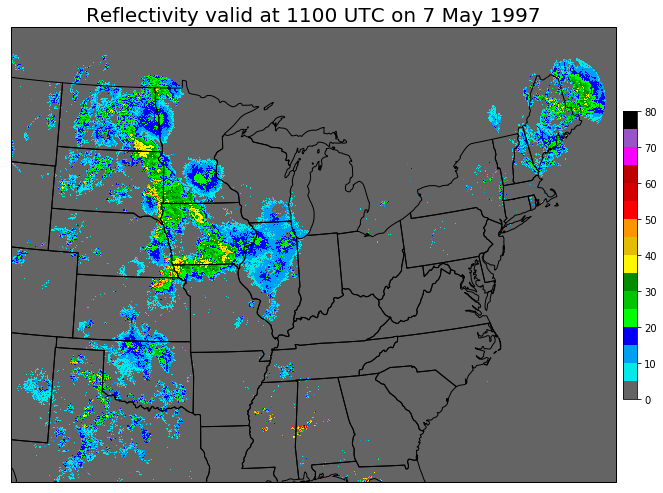

In [1]:
from imageio import imread
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from utils.colors import radar_colormap
from skimage.measure import regionprops
from utils.mapping_help import *
from utils.features import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

data_location = "../data"

to_proj = ccrs.AlbersEqualArea(central_longitude=-95, central_latitude=38.0000)
from_proj = ccrs.PlateCarree()

img = imread(data_location + "/radar_data/BREF_970507_1100.png", pilmode='P')

view = generate_view(-105, -70, 30, 50, from_proj, to_proj)

cmap = radar_colormap()
classes = list(range(0, 85, 5))
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)
lons, lats = get_NOWrad_conus_lon_lat()
lons, lats = np.meshgrid(lons, lats)
mmp = view.pcolormesh(lons, lats, img*5, cmap=cmap, norm=norm, transform=from_proj)

plt.colorbar(mmp, ax=view, shrink=0.4, pad=0.01)

plt.title("Reflectivity valid at 1100 UTC on 7 May 1997", fontsize=20)

# Read in our classifier

In [2]:
rf_clf = pickle.load(open(data_location + "/classifiers/my_random_forest.pkl", 'rb'))

# Zoom in on northern MCS

MCS: 82.0%

filename:None
solidity:0.481555814234
eccentricity:0.8611731503820806
convex_area:99652
convection_area:4584
minor_axis_length:212.15211368419403
intense_convection_ratio:0.180628272251
intensity_variance:49.741293927
intense_stratiform_ratio:0.0172543135784
area:47988
max_intensity:55
major_axis_length:417.3661656505161
convection_stratiform_ratio:0.0955238809702
mean_intensity:27.5539718263
intense_area:828


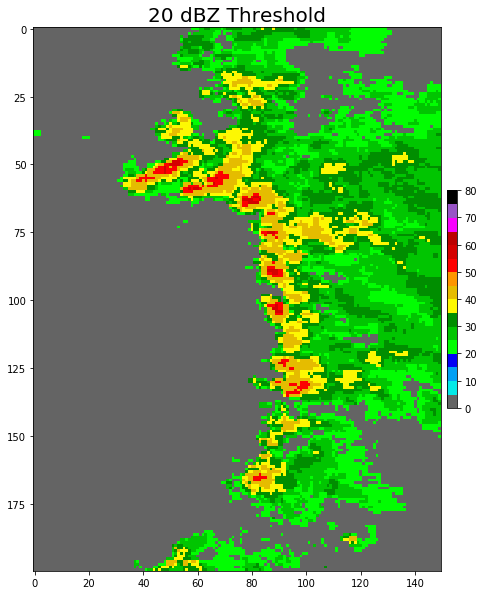

In [3]:
labels = ['MCS', 'Unorganized', 'Tropical', 'Synoptic', 'Clutter']

def example_properties(img, classifier, xmin, xmax, ymin, ymax):
    
    orig = img[ymin:ymax, xmin:xmax]
    thresh = 1*(orig>=4)

    props = regionprops(thresh, intensity_image=orig)[0]

    features = calc_features(props=props)

    ax = plt.subplot(1, 1, 1)
    mmp = ax.imshow(thresh*orig*5, norm=norm, cmap=cmap)
    ax.set_title("20 dBZ Threshold", fontsize=20)
    plt.colorbar(mmp, ax=ax, shrink=0.4, pad=0.01)

    feature_vector = np.array([features[feature] for feature in feature_list[:-1]])

    class_name = classifier.predict(feature_vector.reshape(1,-1))[0]
    proba = classifier.predict_proba(feature_vector.reshape(1,-1))[0]

    perc = float(proba[np.argmax(proba)])*100

    print(labels[class_name] +  ": %.1f" % perc + '%\n')
    [print(x + ":" + str(y)) for (x, y) in features.items()];

example_properties(img, rf_clf, 1650, 1800, 450, 650)

# Zoom in on southern MCS

MCS: 90.0%

filename:None
solidity:0.4906094289
eccentricity:0.8869520583562207
convex_area:52180
convection_area:4960
minor_axis_length:138.14097338811928
intense_convection_ratio:0.192741935484
intensity_variance:70.0258636475
intense_stratiform_ratio:0.03734375
area:25600
max_intensity:65
major_axis_length:299.09609929775553
convection_stratiform_ratio:0.19375
mean_intensity:30.69140625
intense_area:956


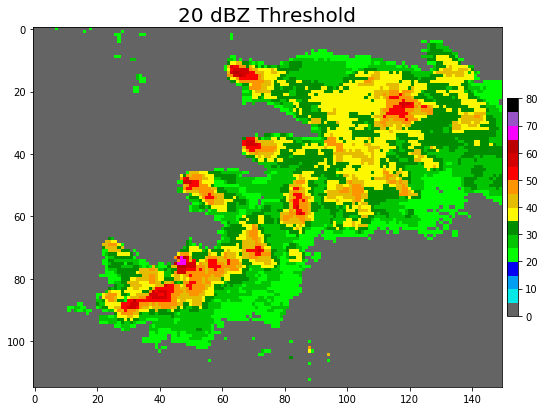

In [4]:
example_properties(img, rf_clf, 1700, 1850, 660, 775)

# Zoom out from two MCS cases

Synoptic: 65.0%

filename:None
solidity:0.215184964516
eccentricity:0.8890594168898871
convex_area:1134596
convection_area:14296
minor_axis_length:654.9024347895541
intense_convection_ratio:0.126748740907
intensity_variance:41.758486113
intense_stratiform_ratio:0.00742172780445
area:244148
max_intensity:65
major_axis_length:1430.568223008256
convection_stratiform_ratio:0.0585546471812
mean_intensity:26.3921064272
intense_area:1812


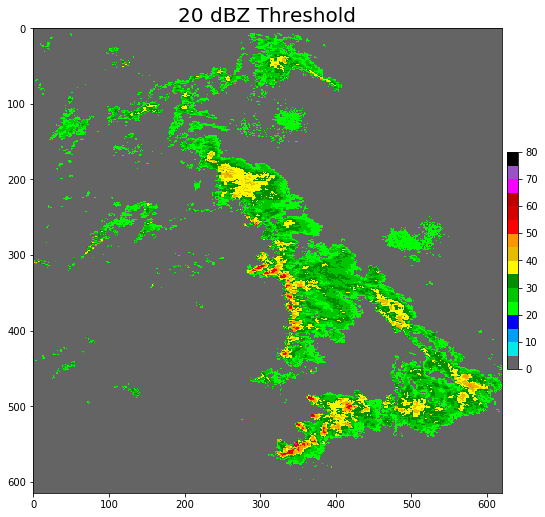

In [5]:
example_properties(img, rf_clf, 1400, 2020, 185, 800)

# Zoom in on unorganized cluster

Unorganized: 52.0%

filename:None
solidity:0.275862068966
eccentricity:0.9341317795734829
convex_area:37700
convection_area:1336
minor_axis_length:117.89763014025421
intense_convection_ratio:0.0928143712575
intensity_variance:58.5982840237
intense_stratiform_ratio:0.0119230769231
area:10400
max_intensity:55
major_axis_length:330.3117933717296
convection_stratiform_ratio:0.128461538462
mean_intensity:27.6307692308
intense_area:124


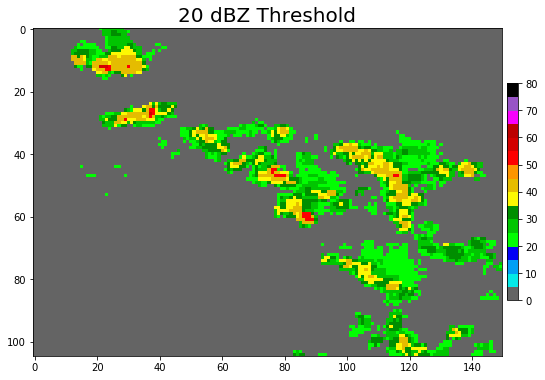

In [6]:
example_properties(img, rf_clf, 1450, 1600, 945, 1050)

Text(0.5,1,'Reflectivity valid at 0520 UTC on 1 April 2008')

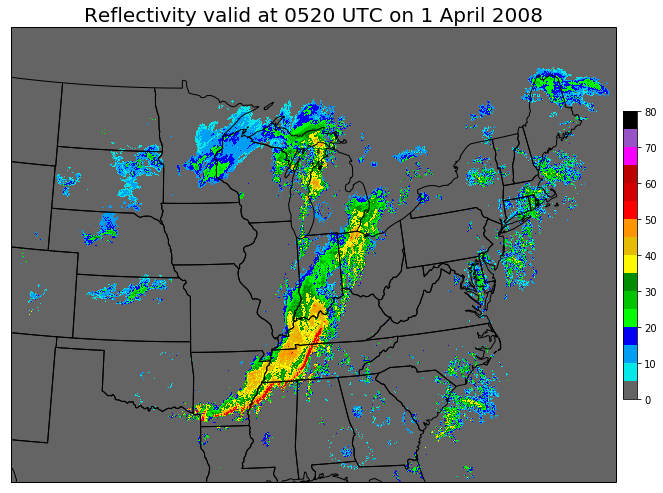

In [7]:
img = imread(data_location + "/radar_data/BREF_080401_0520.png", pilmode='P')

view = generate_view(-105, -70, 30, 50, from_proj, to_proj)

cmap = radar_colormap()
classes = list(range(0, 85, 5))
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)
lons, lats = get_NOWrad_conus_lon_lat()
lons, lats = np.meshgrid(lons, lats)
mmp = view.pcolormesh(lons, lats, img*5, cmap=cmap, norm=norm, transform=from_proj)

plt.colorbar(mmp, ax=view, shrink=0.4, pad=0.01)

plt.title("Reflectivity valid at 0520 UTC on 1 April 2008", fontsize=20)

# Zoom in on squall line

MCS: 93.0%

filename:None
solidity:0.436358205201
eccentricity:0.9361147757222112
convex_area:508848
convection_area:73744
minor_axis_length:372.70681075610224
intense_convection_ratio:0.144282924713
intensity_variance:74.7784523464
intense_stratiform_ratio:0.0479192938209
area:222040
max_intensity:65
major_axis_length:1059.7454667089537
convection_stratiform_ratio:0.332120338678
mean_intensity:33.1221401549
intense_area:10640


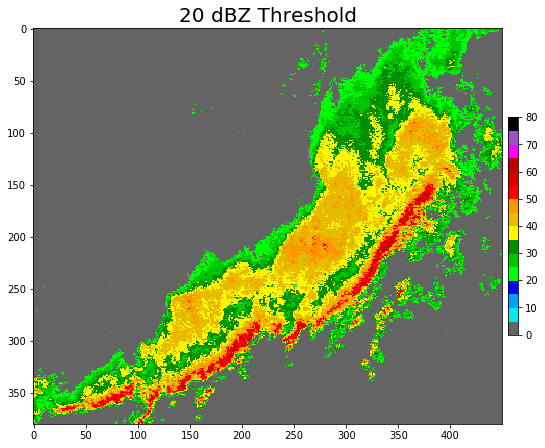

In [8]:
example_properties(img, rf_clf, 1900, 2350, 720, 1100)

Text(0.5,1,'Reflectivity valid at 1000 UTC on 29 August 2005')

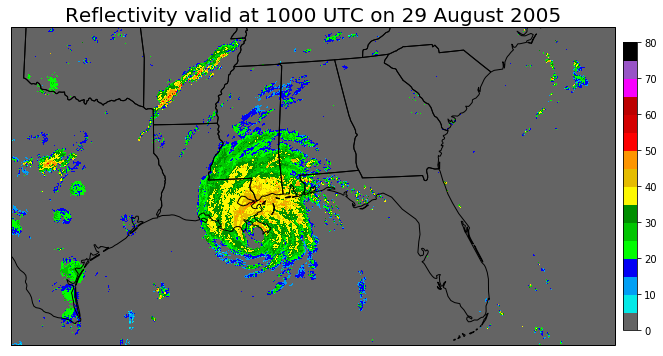

In [9]:
img = imread(data_location + "/radar_data/BREF_050829_1030.png", pilmode='P')

view = generate_view(-100, -75, 25, 35, from_proj, to_proj)

cmap = radar_colormap()
classes = list(range(0, 85, 5))
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)
lons, lats = get_NOWrad_conus_lon_lat()
lons, lats = np.meshgrid(lons, lats)
mmp = view.pcolormesh(lons, lats, img*5, cmap=cmap, norm=norm, transform=from_proj)

plt.colorbar(mmp, ax=view, shrink=0.4, pad=0.01)

plt.title("Reflectivity valid at 1000 UTC on 29 August 2005", fontsize=20)

# Zoom in on Katrina

Tropical: 94.0%

filename:None
solidity:0.453603987283
eccentricity:0.4229724109873704
convex_area:474308
convection_area:24276
minor_axis_length:536.4759546347871
intense_convection_ratio:0.0125226561213
intensity_variance:43.4424605181
intense_stratiform_ratio:0.0014129808318
area:215148
max_intensity:50
major_axis_length:592.043656432369
convection_stratiform_ratio:0.11283395616
mean_intensity:29.3813560898
intense_area:304


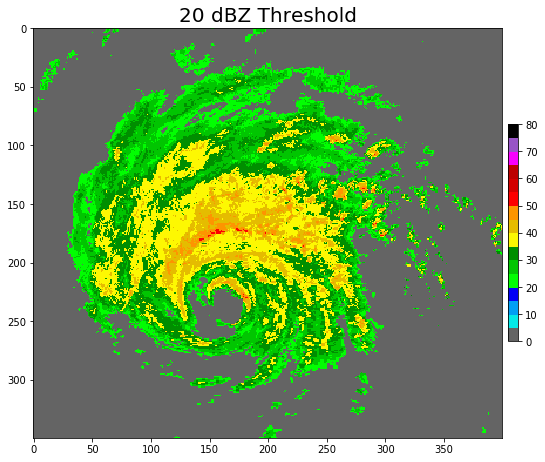

In [10]:
example_properties(img, rf_clf, 1950, 2350, 1100, 1450)

# Zoom in on some clutter in Texas

Clutter: 100.0%

filename:None
solidity:0.493170834209
eccentricity:0.8365436865301864
convex_area:19036
convection_area:0
minor_axis_length:103.16088102487247
intense_convection_ratio:0
intensity_variance:5.89254537926
intense_stratiform_ratio:0
area:9388
max_intensity:30
major_axis_length:188.28406274607286
convection_stratiform_ratio:0
mean_intensity:21.6148274393
intense_area:0


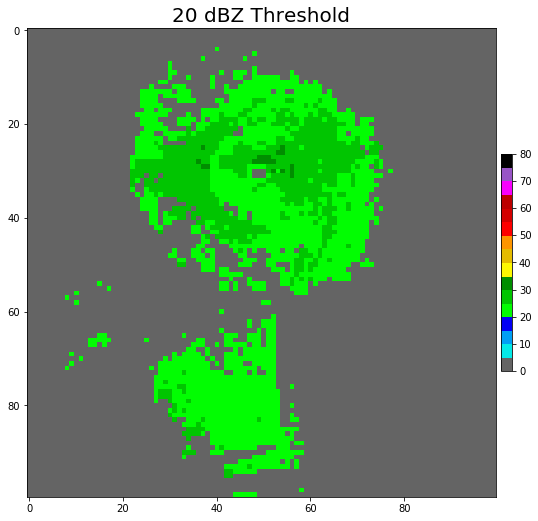

In [11]:
example_properties(img, rf_clf, 1650, 1750, 1375, 1475)